# Bank Customer Churn Prediction

## Initialization

Dependencies

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Bank Customer Churn Prediction.csv")

In [3]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Data Info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Columns

In [6]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

## EDA

1. How many total countries are there

In [7]:
data['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

2. Plot all the countries on a geographic graph

In [8]:
country = {'Country': data['country'].value_counts().index,
           'Value': data['country'].value_counts().values}

In [9]:
import plotly.express as px

fig = px.choropleth(country, 
                    locations="Country", 
                    locationmode="country names", 
                    color="Value",
                    hover_name="Country",
                    title="Country Values on a World Map",)
fig.show()

3. How many accounts are active and how many are inactive

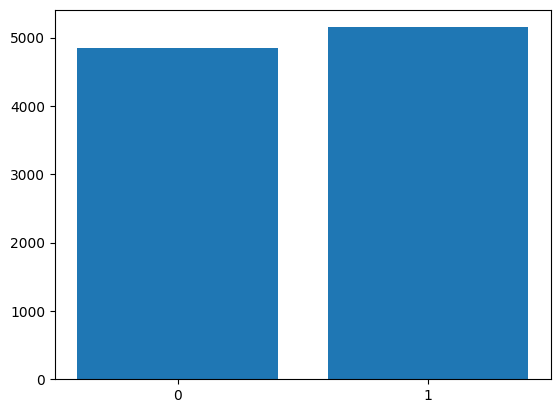

In [10]:
import matplotlib.pyplot as plt

activeMembers = data['active_member'].value_counts()

plt.xticks([0,1])
plt.bar(activeMembers.index,activeMembers.values)

plt.show()

4. How many people does have credit and how many does not

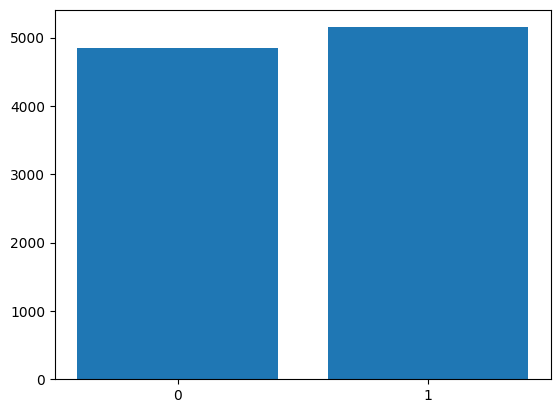

In [11]:
activeCreditCards = data['active_member'].value_counts()

plt.xticks([0,1])
plt.bar(activeCreditCards.index,activeCreditCards.values)

plt.show()

5. How many people are male and female with active accounts

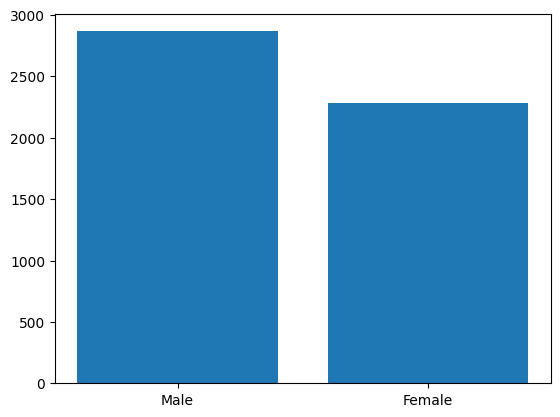

In [12]:
genderBasedData = data[data['active_member'] == 1]['gender'].value_counts()

plt.bar(genderBasedData.index,genderBasedData.values)
plt.show()

6. Make box plot for balance and estimated salary

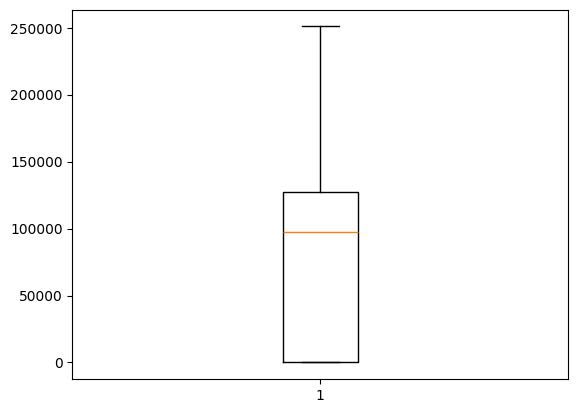

In [13]:
plt.boxplot(data['balance'])
plt.show()

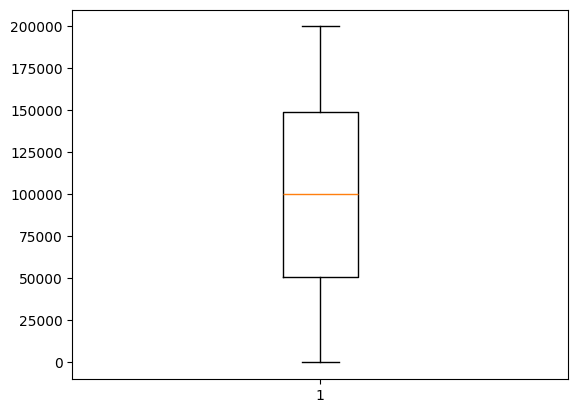

In [14]:
plt.boxplot(data['estimated_salary'])
plt.show()

It confirms that their are no outliers

## Feature Engineering

1. Convert gender value into 0 and 1

In [15]:
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'Male' else 0)
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


2. Do feature engineering in country section

In [16]:
dummies = pd.get_dummies(data['country'],dtype=int)
combinedDf = data.join(dummies)
combinedDf.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


## Data Preprocessing

Train and test split

In [17]:
from sklearn.model_selection import train_test_split
columnsForPrediction = ['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'France', 'Germany', 'Spain']
X = combinedDf[columnsForPrediction]
y = combinedDf['churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=35,shuffle=True)

Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(X_train)
scaled_test_data = scaler.transform(X_test)

scaled_data = pd.DataFrame(scaled_data)
scaled_test_data = pd.DataFrame(scaled_test_data)

## Model Training

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [35]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(scaled_data, y_train)
y_pred = classifier.predict(scaled_test_data)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

Accuracy: 85.52%


array([[1916,   78],
       [ 284,  222]])